# Practical Statistics for Data Scientists


In [2]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [3]:
data = pd.read_csv("Medals.csv",encoding='latin-1')
data

,TRank,Team/NOC,Gold,Silver,Bronze,Total,Trank_by_Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [4]:
data.head()

,TRank,Team/NOC,Gold,Silver,Bronze,Total,Trank_by_Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [5]:
# Mean
data['Total'].mean()

11.612903225806452

In [11]:
# weighted mean
np.average(data['Total'], weights= data['Gold'])

46.832352941176474

In [13]:
# trim_mean
from scipy.stats import trim_mean
trim_mean(data['Gold'],0.1)

1.96

In [21]:
# 75th percentile
per_75 = np.percentile(data['Total'],75)
per_75

11.0

In [22]:
# summary of the loaded data
data.describe()

,TRank,Gold,Silver,Bronze,Total,Trank_by_Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## variablitiy of data


In [23]:
# variance
from statistics import variance
variance(data['Gold'])

49.315100514259

In [24]:
# standard deviation
from statistics import stdev
stdev(data['Gold'])

7.022471111671376

In [27]:
# absolute mean deviation
from numpy import mean, absolute
mean(absolute(data['Gold'])-mean(data['Gold']))

-2.1965702852798796e-16

In [30]:

mean(absolute(data['Gold']-mean(data['Gold'])))

4.0048560527228565

In [35]:
# inter_quartile_range(IQR)
q1,q2 = np.percentile(data['Gold'],[75,25])
IQR = q1-q2
IQR
# q2

3.0

## visualization

<AxesSubplot:>

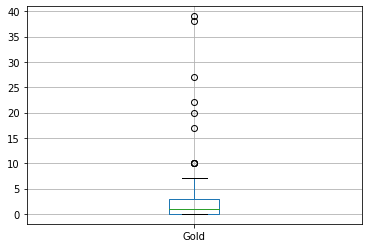

In [32]:
# boxplot
data.boxplot(column="Gold")

In [37]:
# frequency table
frequency_table = data.copy()
frequency_table['freq'] = pd.cut(data['Gold'],10)
frequency_table.head()

,TRank,Team/NOC,Gold,Silver,Bronze,Total,Trank_by_Total,freq
0,1,United States of America,39,41,33,113,1,"(35.1, 39.0]"
1,2,People's Republic of China,38,32,18,88,2,"(35.1, 39.0]"
2,3,Japan,27,14,17,58,5,"(23.4, 27.3]"
3,4,Great Britain,22,21,22,65,4,"(19.5, 23.4]"
4,5,ROC,20,28,23,71,3,"(19.5, 23.4]"


In [40]:
frequency_table.groupby('freq')['Gold'].count().reset_index()

,freq,Gold
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


ValueError: `bw_method` should be 'scott', 'silverman', a scalar or a callable.

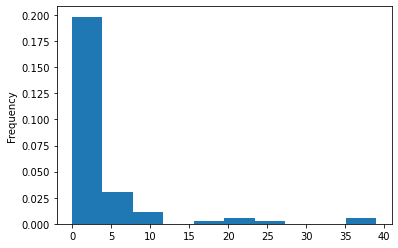

In [46]:
ax = data['Gold'].plot.hist(density=True)
data['Gold'].plot.density(ax)

Text(0, 0.5, 'gold counts')

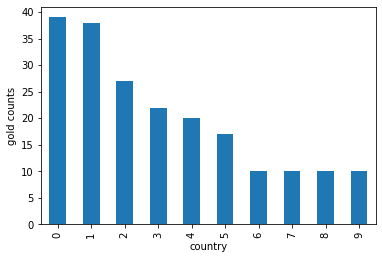

In [53]:
# bar_plot
bar_chart = data['Gold'].iloc[:10:1].plot.bar(x = 'Team/NOC',y = 'Gold')
bar_chart.set_xlabel("country")
bar_chart.set_ylabel('gold counts')
# plt.xlabel('teams')
# plt.ylabel('No. of Gold medals')


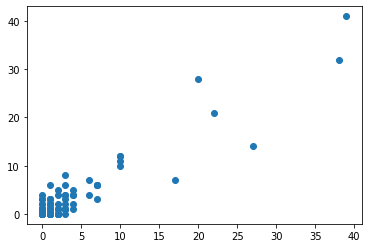

In [56]:
# scatter_plot
plt.scatter(x=data['Gold'],y=data['Silver'])

E:\apps\python 3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

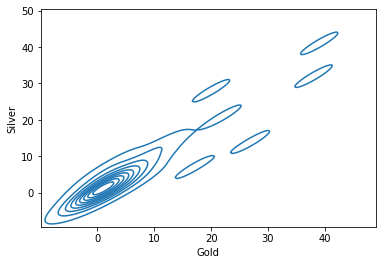

In [57]:
# contour_plot
import seaborn as sns
con = sns.kdeplot(data['Gold'],data['Silver'])
con

E:\apps\python 3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold'>

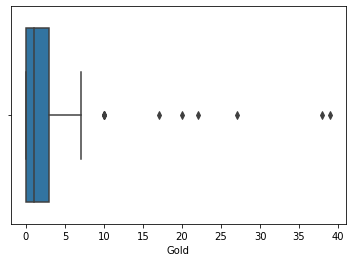

In [58]:
sns.boxplot(data['Gold'])

E:\apps\python 3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Silver'>

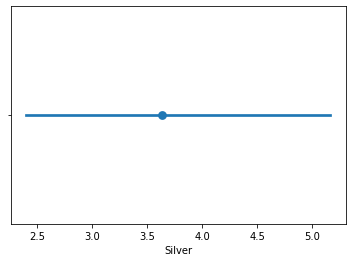

In [60]:
# point_plot
sns.pointplot(data['Silver'])

<AxesSubplot:>

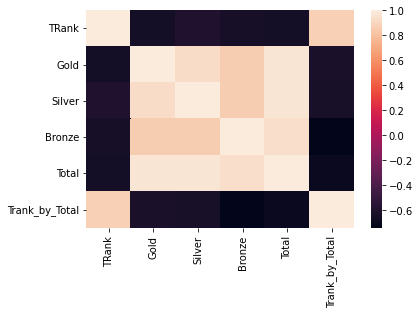

In [62]:
# heatmap
sns.heatmap(data.corr())